In [1]:
import pandas as pd
import numpy as np
df= pd.read_excel('Dataset/Clean Dataset.xlsx') 
df

,label,tweet,clean_data
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jalan jatibarupolisi gertak gubernur emangny p...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewek kayak rasain sibuk jaga rasain sakit hai...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibarubagian wilayah tn abangpengatura...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",papa mejam mata tahan gejolak batin papa tapu ...
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulit calon wapresnya jokowi pilpres salah gem...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",iya gimana coba lulus seni nari kerja narinari...
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,mahasiswa teknik ui nembak pacar sahur kukus t...


In [2]:
# library mengubah label dari text menjadi angka
from sklearn.preprocessing import LabelEncoder
# library memisahkan data latih dan data uji
from sklearn.model_selection import train_test_split
# library tfidf untuk pembobotan data
from sklearn.feature_extraction.text import TfidfVectorizer
# library pengklasifikasi SVM
from sklearn import model_selection, svm
from sklearn.metrics import classification_report
# library K-fold cross validation
from sklearn.model_selection import KFold
# library penghitungan akurasi menggunakan confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
def train_model(df, max_features):
    
    x = df['clean_data'].values.astype('U')
    y = df['label'].values
    
    # split data model
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    
# transformasi data label
    encoder = LabelEncoder()
    encoder.fit(y)
    y_train = encoder.transform(y_train)
    y_test = encoder.transform(y_test)
    
# term weighting 
    Tfidf_vect = TfidfVectorizer(max_features=max_features)
    Tfidf_vect.fit(x)
    
    x_train_vect = Tfidf_vect.transform(x_train)
    x_test_vect = Tfidf_vect.transform(x_test)
    
# train Support Vector Machine
    SVM = svm.SVC(C=1, gamma='scale', kernel='rbf', probability=True)
    SVM.fit(x_train_vect, y_train)
    
    return SVM, x_test_vect, y_test

Akurasi SVM tanpa optimasi PSO 63.718820861678005
              precision    recall  f1-score   support

       anger       0.61      0.72      0.66       119
        fear       0.95      0.58      0.72        62
       happy       0.66      0.56      0.60       111
        love       0.81      0.80      0.81        55
     sadness       0.46      0.56      0.51        94

    accuracy                           0.64       441
   macro avg       0.70      0.65      0.66       441
weighted avg       0.66      0.64      0.64       441

[[86  1  8  1 23]
 [ 9 36  8  0  9]
 [20  0 62  4 25]
 [ 1  0  5 44  5]
 [24  1 11  5 53]]


<AxesSubplot:>

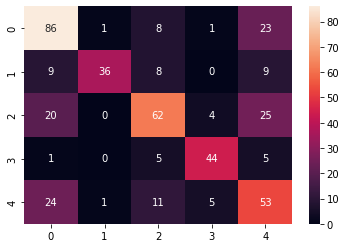

In [4]:
SVM, x_test, y_test = train_model(df, 1000)
predictions_SVM = SVM.predict(x_test)
accuracy = accuracy_score(predictions_SVM, y_test)
print('Akurasi SVM tanpa optimasi PSO', accuracy*100)

x = df['clean_data'].values.astype('U')
y = df['label'].values

encoder = LabelEncoder()
encoder.fit(y)
# print(encoder.classes_)
target_names = encoder.classes_

print(classification_report(y_test, predictions_SVM, target_names=target_names))
print(confusion_matrix(y_test, predictions_SVM, labels=[0, 1, 2, 3, 4]))

cf = confusion_matrix(y_test, predictions_SVM, labels=[0, 1, 2, 3, 4])
sns.heatmap(cf, annot=True, fmt='d')